In [1]:
import os
path = r'D:\DataScience\projects\titanic'
os.chdir(path)
os.listdir()

import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
from sklearn import metrics, linear_model,ensemble
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,MaxAbsScaler,normalize



# 1. Collect data, Understanding Data

In [2]:


train_ds = pd.read_csv('titanic.csv')
test_ds = pd.read_csv('test_titanic.csv')
train_ds.head()
train_ds.describe()
train_ds.isnull().count()
train_ds.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# 2. Visualize Data

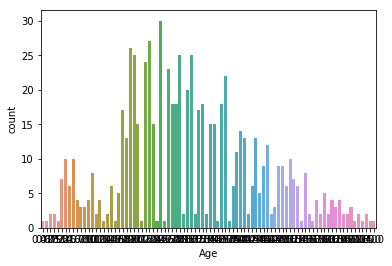

In [3]:
#sex vs survived
a = train_ds[['Survived','Sex']].head(10)
pd.crosstab(index=train_ds['Survived'], columns=train_ds['Sex']).reset_index()
#age vs survived
ax = sns.countplot(x="Age", data=train_ds)

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

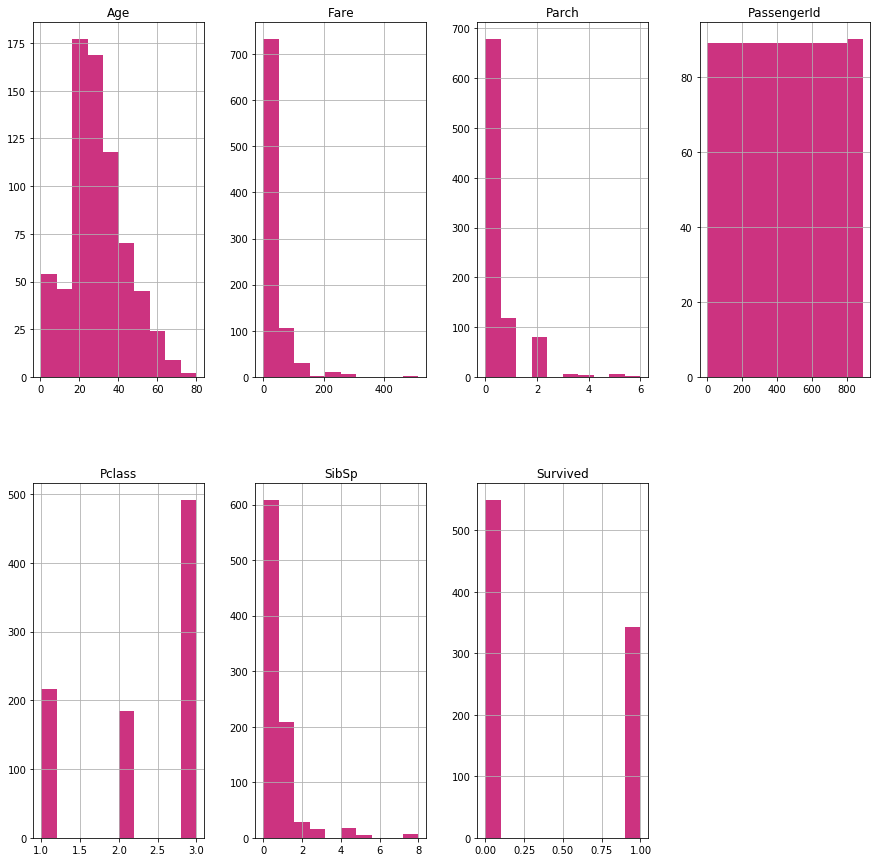

In [7]:
# Data Visualisation
train_ds.hist(color=(.8, 0.2, 0.5), layout=(2, 4),figsize=[15, 15]);

train_ds.skew()

#type(train_ds)
#?pd.core.frame.DataFrame.hist
#?plt.pyplot.hist



In [232]:
#mask = np.zeros(train_ds.shape)
#mask[1::2,1::2] = 1
#mask = train_ds.isnull().values.astype(int)
#np.nan_to_num(train_ds, copy=True)
#np.isnan(train_ds)
#train_ds[np.isnan(train_ds)]=0



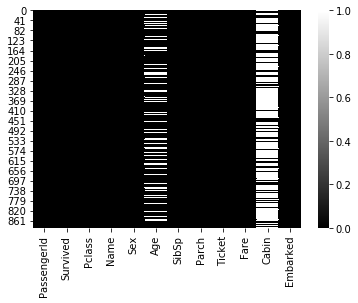

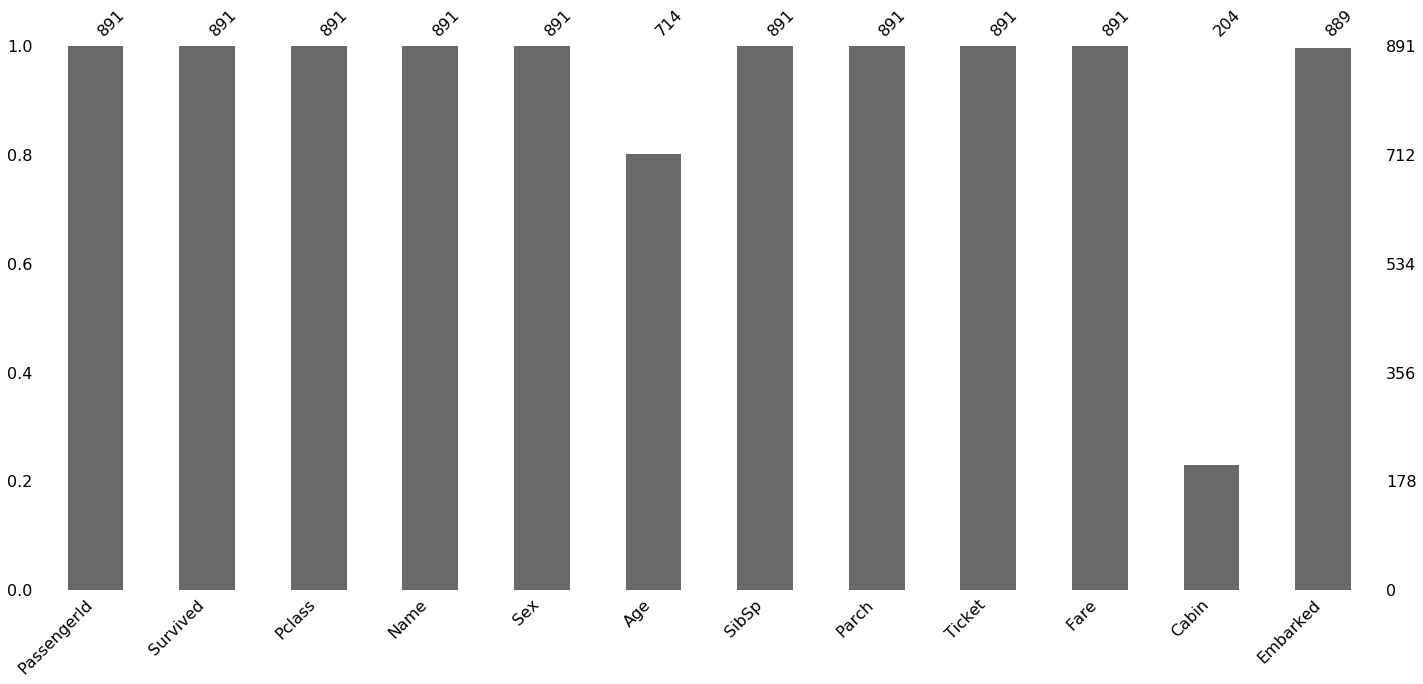

In [233]:
#to find missing values
sns.heatmap(train_ds.isnull(),  cmap='binary_r')
#missing value count
#type(ds.values)
msno.bar(train_ds)


In [234]:
#% of missing value features

percent_1 = round(train_ds.isnull().sum()/train_ds.isnull().count()*100, 2).sort_values(ascending=False)
percent_1
# OR
missing_total = train_ds.isnull().sum().sort_values(ascending=False)
each = round(train_ds.isnull().sum()/train_ds.isnull().count()*100, 1).sort_values(ascending=False)
dataView = pd.concat([missing_total, each], axis=1, keys=['MissingCount', 'missing%'])
dataView.head()

train_ds.Embarked.value_counts()
train_ds.Embarked.mode()
#Asssumptions:
# 77.10% of data is missing from column Cabin. Can this be removed?
# Age value should be filled based on average of each Sex
# Embarked value can be filled up by mode value


0    S
dtype: object

# 3. Feature Selection

In [235]:

#data[1].describe()

#remove noisy data, (features that do not contribute to the solution/label)
train_ds.drop(['Cabin','Ticket','PassengerId','Fare','Name'], axis=1, inplace=True)
test_ds.drop(['Cabin','Ticket','Fare','Name'], axis=1, inplace=True)




# 4. Missing value imputation


In [236]:
#Removed Cabin variable
## [Feature selection based on missing values]
### -Already removed
data = [train_ds, test_ds]

for opt_ds in data:
    #Filling Embarked values with its mode value
    opt_ds['Embarked'].fillna(opt_ds.Embarked.mode()[0],inplace = True)
    # Finding the Average age for each sex and replace it for null
    mnBySex = round(opt_ds.groupby(['Sex'])['Age'].mean())
    opt_ds['Age'].fillna(opt_ds.apply(lambda x: mnBySex[x['Sex']], axis=1),inplace = True)

#a = lambda x:x[x.isnull().any(axis=1)]
#b = tmp[tmp.isnull().any(axis=1)][0:1]
#tmp['New'] = tmp['Age'].fillna(lambda x,y: x[y['Sex'].values[0]],inplace = False)
#tmp['New'] = tmp['Age'].fillna(tmp.apply(lambda x: getMeanAge(tmp, x['Sex']), axis=1))

#sns.heatmap(tmp.corr(),annot=True)
#train_ds.isnull().sum()

#Fillna for test set
#test_ds.fillna(test_ds.loc[test_ds['Pclass'].isin([3])]['Fare'].mean(),inplace = True)



# 5.Categorical Encoding
## One-Hot Encoding and LabelEncoding or NumericEncoding


In [237]:
# we do one hot encoding
train_ds = pd.get_dummies(train_ds, prefix_sep='_', drop_first=True)
test_ds = pd.get_dummies(test_ds, prefix_sep='_', drop_first=True)





# 5.Feature Scaling
## standardisation and normalisation

In [238]:
# scale our features to a range which is centered around zero
X_train = train_ds.drop("Survived", axis=1)
Y_train = train_ds["Survived"]
X_test  = test_ds.drop("PassengerId", axis=1).copy()
result = pd.Series()
result["PassengerId"] = test_ds["PassengerId"];

sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

##PCA based feature selection -but no improvement
#pca = PCA(n_components=6)
#pca_ds = pca.fit_transform(X_train)
#pca.explained_variance_ratio_

In [239]:

#test_ds.isnull().sum()
#pca.explained_variance_ratio_

#pca.explained_variance_ratio_

#var = np.cumsum(round([pca.explained_variance_]))
#var


#feat_cols = ['feature'+str(i) for i in range(X_train.shape[1])]
#feat_cols = ['feature'+str(i) for i in range(pca.n_components)]

#test_ds.head()

#pca.explained_variance_ratio_
#pca_test = pd.DataFrame(data = pca_ds, columns = feat_cols[0:len(feat_cols)])




# 6.Machine Learning Model

In [240]:

#Regression Algorithm
#mdl = linear_model.LogisticRegression()
#Random Forest 
mdl = ensemble.RandomForestClassifier(n_estimators  = 30)

mdl.fit(X_train, Y_train)
Y_test = mdl.predict(X_test)



#pd.concat([result, pd.DataFrame(Y_test)], axis=1)
result = pd.DataFrame({'PassengerId':result.PassengerId.tolist(), 'Survived':Y_test.tolist()})

result.to_csv('result.csv',index=False)
print("Accuracy:", mdl.score(X_train, Y_train))

Accuracy: 0.936026936026936


# 7.Model Evaluation

In [171]:

print("Accuracy:", lgmdl.score(X_train, Y_train))
print("Accuracy: {:0.3f}".format(metrics.accuracy_score(y_test, y_pred)))
print("Balanced Accuracy: {:0.3f}".format(metrics.balanced_accuracy_score(y_test, y_pred)))
print("F1 Score: {:0.3f}".format(metrics.f1_score(y_test, y_pred, average="macro")))
print("Precision: {:0.3f}".format(metrics.precision_score(y_test, y_pred, average="macro")))
print("Recall: {:0.3f}".format(metrics.recall_score(y_test, y_pred, average="macro")))

Accuracy: 0.8024691358024691


NameError: name 'y_test' is not defined